In [253]:
#@title Read the CSV file into a DataFrame
import pandas as pd

# Replace 'your_file.csv' with the actual file path of your CSV file.
file_path = 'data.csv'

# Use pandas to read the CSV file into a DataFrame.
df = pd.read_csv(file_path)

In [254]:
df.head()

,date,BTCUSDT,ETHUSDT,BNBUSDT,XRPUSDT,DOGEUSDT,ADAUSDT,MATICUSDT,LTCUSDT,TRXUSDT,...,ETCUSDT,BCHUSDT,XLMUSDT,ALGOUSDT,VETUSDT,FILUSDT,NEARUSDT,EOSUSDT,HBARUSDT,THETAUSDT
0,2023-02-13,21773.97,0.00,0.0,0.0000,0.08209,0.0000,0.0000,0.00,0.00000,...,0.00,123.8,0.0850,0.0000,0.00000,0.000,0.000,0.000,0.0000,0.000
1,2023-02-12,21783.54,1514.83,312.6,0.3747,0.08215,0.3641,1.2360,92.51,0.06388,...,21.06,122.9,0.0851,0.2474,0.02358,4.919,2.237,1.042,0.0868,1.067
2,2023-02-11,21862.55,1538.51,310.4,0.3833,0.08225,0.3684,1.2493,94.28,0.06372,...,21.49,124.6,0.0862,0.2566,0.02388,5.102,2.285,1.057,0.0881,1.076
3,2023-02-10,21625.19,1513.06,305.8,0.3817,0.08089,0.3581,1.2298,93.34,0.06329,...,20.97,124.3,0.0857,0.2510,0.02357,4.848,2.250,1.052,0.0761,1.050
4,2023-02-09,21796.35,1545.35,306.2,0.3819,0.08144,0.3622,1.2297,92.05,0.06265,...,20.90,126.6,0.0857,0.2548,0.02329,4.789,2.270,1.044,0.0716,1.046


# Preprocessing

In [255]:
import matplotlib.pyplot as plt
import pandas as pd


# Pre processing emove the first row
data = df.copy()
data = data.iloc[1:]

# Preprocessing. These are the dates that are faulty
data = data[~data['date'].str.endswith('04:00:00')]
data = data[~data['date'].str.endswith('00:00:00')]

# Reverse the rows
data = data.iloc[::-1]

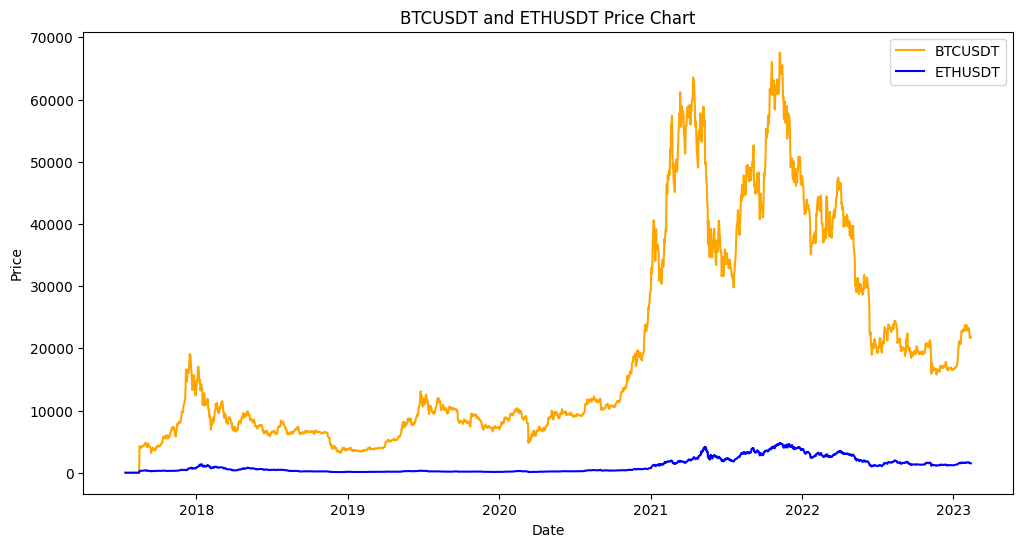

In [215]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your CSV has columns named 'Date', 'BTCUSDT', and 'ETHUSDT'
dates = pd.to_datetime(data['date'], format='%Y-%m-%d')
btc_prices = data['BTCUSDT']
eth_prices = data['ETHUSDT']

plt.figure(figsize=(12, 6))
plt.plot(dates, btc_prices, label='BTCUSDT', color='orange')
plt.plot(dates, eth_prices, label='ETHUSDT', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('BTCUSDT and ETHUSDT Price Chart')
plt.legend()

plt.show()

# Investment strategy

Assuming you have a bi-weekly discretionary income of $100.

## DCA consistently into BTC

In [216]:
import pandas as pd

def calculate_dca_strategy(data, coin_column, start_date, end_date, investment_amount, interval_days):
    """
    Calculate the total amount of a specific cryptocurrency acquired through Dollar-Cost Averaging (DCA) strategy.

    Parameters:
        - data (DataFrame): DataFrame containing historical price data for multiple coins.
        - coin_column (str): Column name specifying the price of the coin of interest.
        - start_date (str): Start date of the DCA strategy in 'YYYY-MM-DD' format.
        - end_date (str): End date of the DCA strategy in 'YYYY-MM-DD' format.
        - investment_amount (float): Amount to invest in each DCA interval.
        - interval_days (int): Number of days between each DCA interval.

    Returns:
        - dca_info (DataFrame): DataFrame containing information about each DCA interval, including Total Invested (USD) and Drawdown.
    """
    # Convert the 'date' column to datetime format
    data['date'] = pd.to_datetime(data['date'])

    # Filter the data for the specified date range
    data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]
    data = data.reset_index()

    # Calculate the number of DCA intervals
    num_intervals = len(data)

    # Initialize lists to store DCA information
    coin_acquired = []
    total_coin_accumulated = []
    total_value_at_interval = []
    total_invested_list = []
    drawdown_list = []

    # Calculate DCA information for each interval
    total_accumulated = 0.0
    total_investment = 0.0
    for i, price in enumerate(data[coin_column]):
        if i % interval_days == 0:
            coin_amount = investment_amount / price
            total_accumulated += coin_amount
            total_investment += investment_amount

        total_invested_list.append(total_investment)
        coin_acquired.append(coin_amount)
        total_coin_accumulated.append(total_accumulated)
        total_value_at_interval.append(total_accumulated * price)
        
        # Calculate drawdown
        max_value = max(total_value_at_interval)
        drawdown = (total_value_at_interval[-1] - max_value) / max_value
        drawdown_list.append(drawdown)

    # Create a DataFrame with DCA information, including Drawdown
    dca_info = pd.DataFrame({
        'Date': data['date'],
        'Amount Acquired': coin_acquired,
        'Total Coin Accumulated': total_coin_accumulated,
        'Total Value (USD)': total_value_at_interval,
        'Total Invested (USD)': total_invested_list,
        'Drawdown': drawdown_list
    })

    return dca_info

In [217]:
interval_days = 14
dca_info_btc = calculate_dca_strategy(data, 'BTCUSDT', '2017-12-16', '2020-09-01', 100, interval_days)
dca_info_eth = calculate_dca_strategy(data, 'ETHUSDT', '2017-12-16', '2020-09-01', 100, interval_days)

Now, plot the function to compared the total value invested vs total coin.

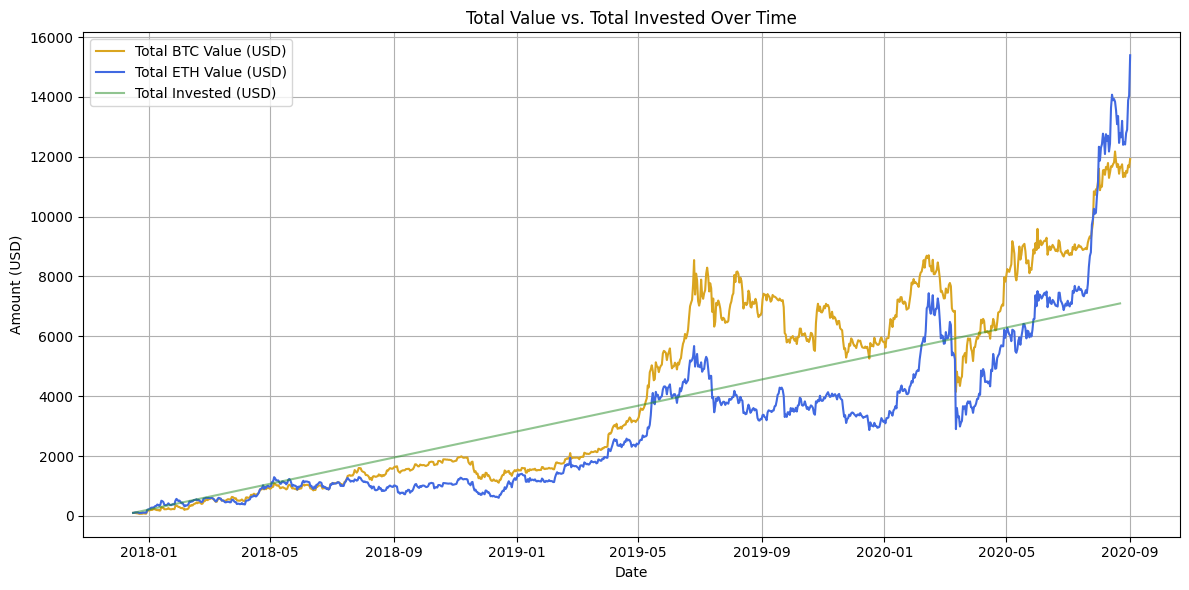

In [218]:
plt.figure(figsize=(12, 6))
plt.plot(dca_info_btc['Date'], dca_info_btc['Total Value (USD)'], label='Total BTC Value (USD)', color='goldenrod')
plt.plot(dca_info_eth['Date'], dca_info_eth['Total Value (USD)'], label='Total ETH Value (USD)', color='royalblue')
plt.plot(dca_info_btc['Date'][::interval_days], dca_info_btc['Total Invested (USD)'][::interval_days], alpha=0.5, label='Total Invested (USD)', color='forestgreen')
plt.xlabel('Date')
plt.ylabel('Amount (USD)')
plt.title('Total Value vs. Total Invested Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

DCA allows you to buy for cheap, but amplifies your gain since you have some time to HODL these coins for cheap.

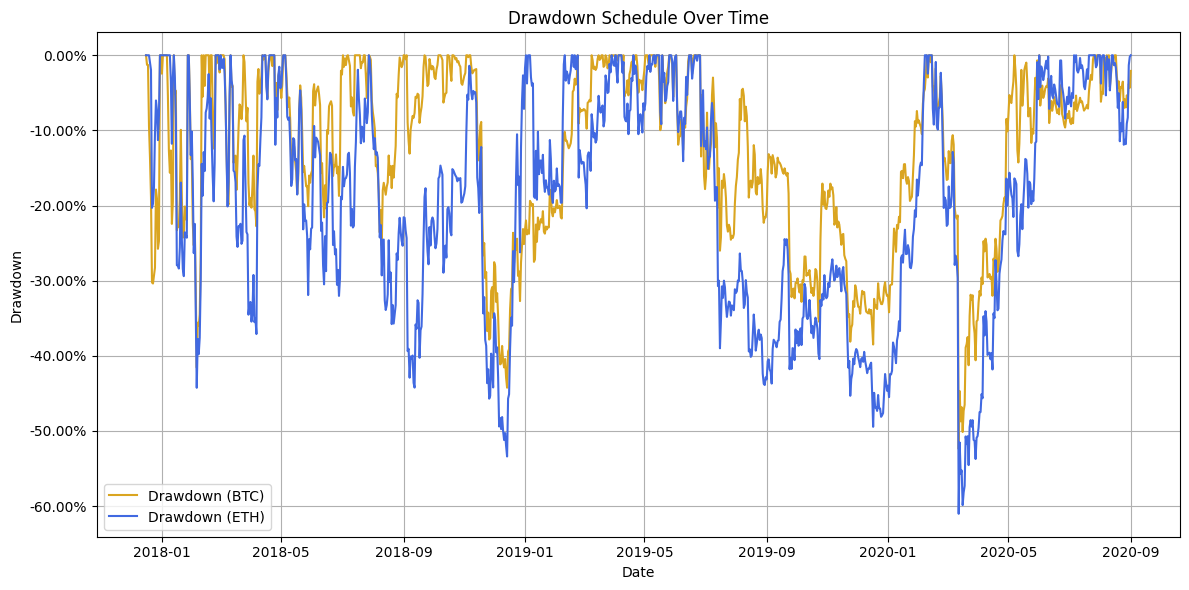

In [224]:
# Calculate drawdown schedule
from matplotlib.ticker import FuncFormatter

# Plot Drawdown
plt.figure(figsize=(12, 6))
plt.plot(dca_info_btc['Date'], dca_info_btc['Drawdown'], label='Drawdown (BTC)', color='goldenrod')
plt.plot(dca_info_eth['Date'], dca_info_eth['Drawdown'], label='Drawdown (ETH)', color='royalblue')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.title('Drawdown Schedule Over Time')
plt.legend()
plt.grid(True)

# Format y-axis labels as percentages
def percentage_formatter(x, pos):
    return f'{x * 100:.2f}%'

plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

plt.tight_layout()
plt.show()

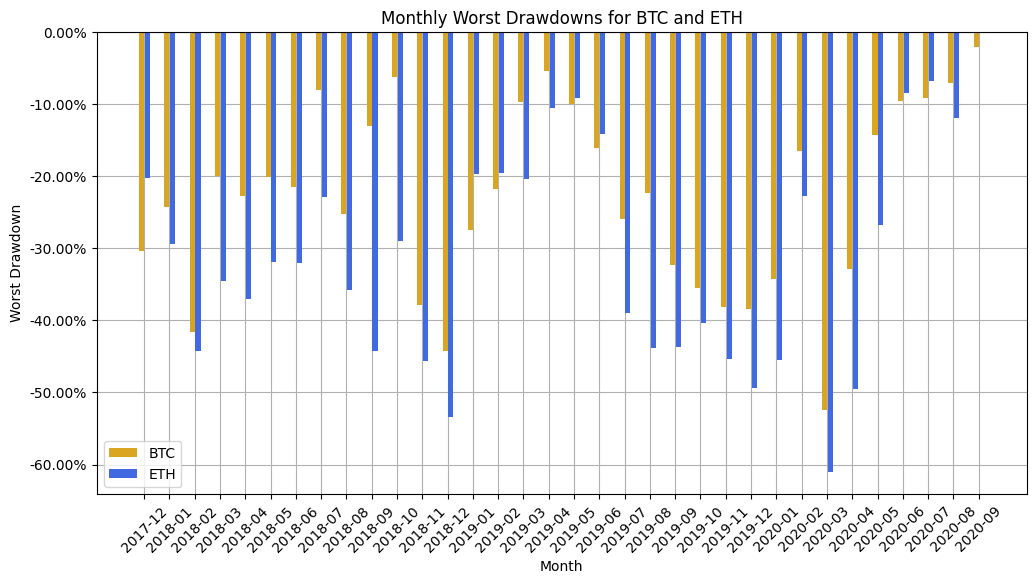

In [225]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Assuming you have dca_info_btc and dca_info_eth DataFrames with columns 'Date' and 'Drawdown'
# Convert the 'Date' column to datetime format if it's not already
dca_info_btc['Date'] = pd.to_datetime(dca_info_btc['Date'])
dca_info_eth['Date'] = pd.to_datetime(dca_info_eth['Date'])

# Create a function to calculate the worst drawdown for each month
def calculate_monthly_worst_drawdown(dca_info):
    # Group the data by year and month and calculate the minimum drawdown for each group
    monthly_worst_drawdown = dca_info.groupby([dca_info['Date'].dt.year, dca_info['Date'].dt.month])['Drawdown'].min()
    return monthly_worst_drawdown

# Calculate monthly worst drawdowns for BTC and ETH
monthly_worst_drawdown_btc = calculate_monthly_worst_drawdown(dca_info_btc)
monthly_worst_drawdown_eth = calculate_monthly_worst_drawdown(dca_info_eth)

# Create a bar chart for monthly worst drawdowns with thinner bars
plt.figure(figsize=(12, 6))
x_labels = [f"{year}-{month:02}" for year, month in monthly_worst_drawdown_btc.index]
btc_worst_drawdown = monthly_worst_drawdown_btc.values
eth_worst_drawdown = monthly_worst_drawdown_eth.values

bar_width = 0.2  # Reduce the width of the bars
bar_spacing = 0.03
index = range(len(x_labels))

# Manually adjust the x-axis positions for each set of data
plt.bar(index, btc_worst_drawdown, width=bar_width, label='BTC', color='goldenrod', zorder=2)  # Set higher zorder
plt.bar([i + (bar_width + bar_spacing) for i in index], eth_worst_drawdown, width=bar_width, label='ETH', color='royalblue', zorder=2)

plt.xlabel('Month')
plt.ylabel('Worst Drawdown')
plt.title('Monthly Worst Drawdowns for BTC and ETH')
plt.xticks([i + bar_width / 2 for i in index], x_labels, rotation=45)
plt.legend()
plt.grid(True)

# Format y-axis labels as percentages
def percentage_formatter(x, pos):
    return f'{x * 100:.2f}%'

plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
plt.show()

Drawdown represents the lowest point that your portfolio fell from the its maximum value. As we all know, both BTC and ETH are extremely volatile assets. A full ETH portfolio can regularly drop below 40% and all the way down to over 60% at its worst moment. This will really test the willpower of the investors, but that would absolute be the worst time to sell, as investors will miss the full rebound gains later on. Therefore, it is best to mentally prepare to hold the coins tight and stay the course.

## DCA consistently into ETH & BTC at 50 / 50 allocation

If a single-coin portfolio proved to be risky, are there any benefits in diversification? What would happens if the investors actually want to DCA their money in a 50/50 portfolio. Wouldn't they be able to buy more of ETH when it is low, and more of BTC when it is high?

In [256]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def calculate_dca_strategy_proportional(data, coin_proportions, start_date, end_date, investment_amount, interval_days):
    """
    Calculate the total amount of a portfolio of cryptocurrencies acquired through Dollar-Cost Averaging (DCA) strategy.

    Parameters:
        - data (DataFrame): DataFrame containing historical price data for multiple coins.
        - coin_proportions (dict): Dictionary specifying the coins to invest in and their proportions.
                                   Example: {'BTCUSDT': 0.7, 'ETHUSDT': 0.3} for 70% BTC and 30% ETH.
        - start_date (str): Start date of the DCA strategy in 'YYYY-MM-DD' format.
        - end_date (str): End date of the DCA strategy in 'YYYY-MM-DD' format.
        - investment_amount (float): Amount to invest in each DCA interval.
        - interval_days (int): Number of days between each DCA interval.

    Returns:
        - dca_info (DataFrame): DataFrame containing information about the portfolio's Total Invested (USD),
          Total Value (USD) for each coin, Total Value (USD) for the entire portfolio, and Drawdown for the portfolio.
    """
    # Convert the 'date' column to datetime format
    data['date'] = pd.to_datetime(data['date'])

    # Filter the data for the specified date range
    data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]
    data = data.reset_index()

    # Initialize dictionaries to store DCA information for each coin
    coin_acquired = {coin: [] for coin in coin_proportions}
    total_coin_accumulated = {coin: [] for coin in coin_proportions}
    total_value_at_interval = {coin: [] for coin in coin_proportions}
    total_invested_list = {coin: [] for coin in coin_proportions}
    drawdown_list = []

    # Initialize lists to store portfolio-level information
    total_value_portfolio_list = []
    total_investment_portfolio_list = []

    # Calculate the number of DCA intervals
    num_intervals = len(data)

    # Initialize dictionaries for total accumulated and invested amounts for each coin
    total_accumulated = {coin: 0.0 for coin in coin_proportions}
    total_investment = {coin: 0.0 for coin in coin_proportions}

    for i, row in data.iterrows():
        print(i)
        total_accumulated_portfolio = 0.0
        total_investment_portfolio = 0.0

        if i % interval_days == 0:
            for coin, proportion in coin_proportions.items():
                coin_price = row[coin]
                coin_amount = (investment_amount * proportion) / coin_price
                total_accumulated[coin] += coin_amount
                total_investment[coin] += (investment_amount * proportion)
           
        for coin, proportion in coin_proportions.items():
            coin_price = row[coin]
            total_coin_accumulated[coin].append(total_accumulated[coin])
            total_value_at_interval[coin].append(total_accumulated[coin] * coin_price)
            total_accumulated_portfolio += total_accumulated[coin]
            total_investment_portfolio += total_investment[coin]

        # Calculate total portfolio value and drawdown
        total_value_portfolio = sum([total_value_at_interval[coin][-1] for coin in coin_proportions])

        # Append total portfolio values and investments to lists
        total_value_portfolio_list.append(total_value_portfolio)
        total_investment_portfolio_list.append(total_investment_portfolio)
        
        # Calculate drawdown
        print(total_coin_accumulated)
        print(total_value_at_interval)
        print(total_value_portfolio_list)
        max_value = max(total_value_portfolio_list)
        drawdown = (total_value_portfolio_list[-1] - max_value) / max_value
        drawdown_list.append(drawdown)

    # Create a DataFrame with DCA information for each coin
    dca_info = pd.DataFrame({'Date': data['date'], 'Drawdown': drawdown_list})
    for coin in coin_proportions:
        dca_info[f'Total Coin Accumulated ({coin})'] = total_coin_accumulated[coin]
        dca_info[f'Total Value (USD) ({coin})'] = total_value_at_interval[coin]
        dca_info[f'Total Invested (USD) ({coin})'] = total_investment[coin]

    # Add portfolio-level information to the DataFrame
    dca_info['Total Value (USD)'] = total_value_portfolio_list
    dca_info['Total Invested (USD)'] = total_investment_portfolio_list

    return dca_info

In [257]:
dca_info = calculate_dca_strategy_proportional(data, {'BTCUSDT': 0.50, 'ETHUSDT': 0.50}, '2017-12-16', '2020-09-01', 100, interval_days)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



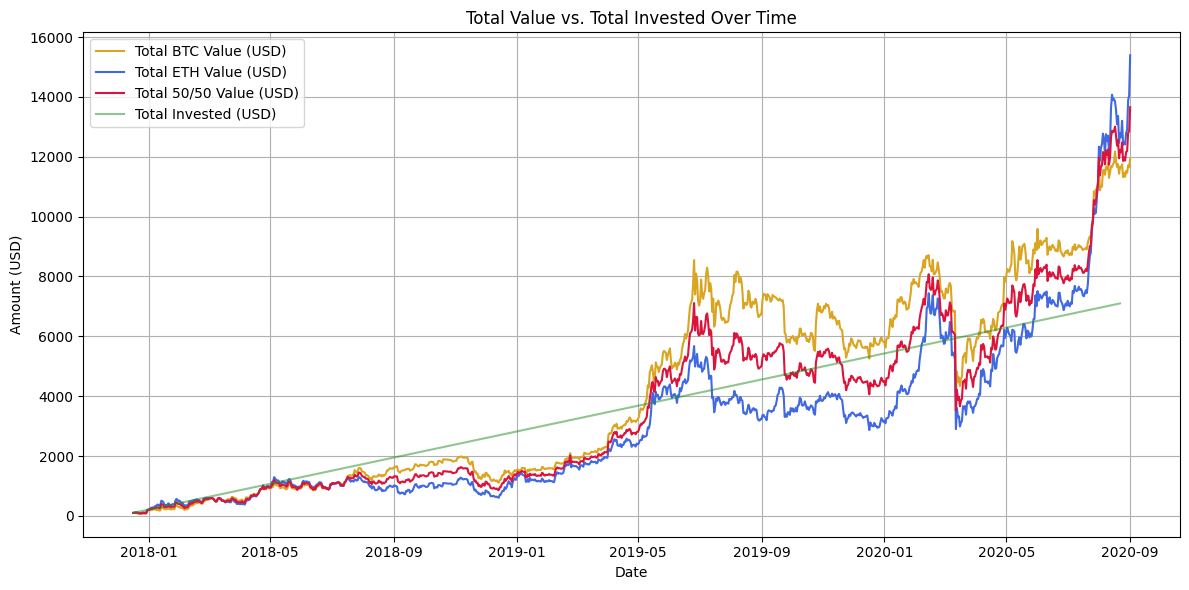

In [258]:
plt.figure(figsize=(12, 6))
plt.plot(dca_info_btc['Date'], dca_info_btc['Total Value (USD)'], label='Total BTC Value (USD)', color='goldenrod')
plt.plot(dca_info_eth['Date'], dca_info_eth['Total Value (USD)'], label='Total ETH Value (USD)', color='royalblue')
plt.plot(dca_info['Date'], dca_info['Total Value (USD)'], label='Total 50/50 Value (USD)', color='crimson')
plt.plot(dca_info_btc['Date'][::interval_days], dca_info_btc['Total Invested (USD)'][::interval_days], alpha=0.5, label='Total Invested (USD)', color='forestgreen')
plt.xlabel('Date')
plt.ylabel('Amount (USD)')
plt.title('Total Value vs. Total Invested Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

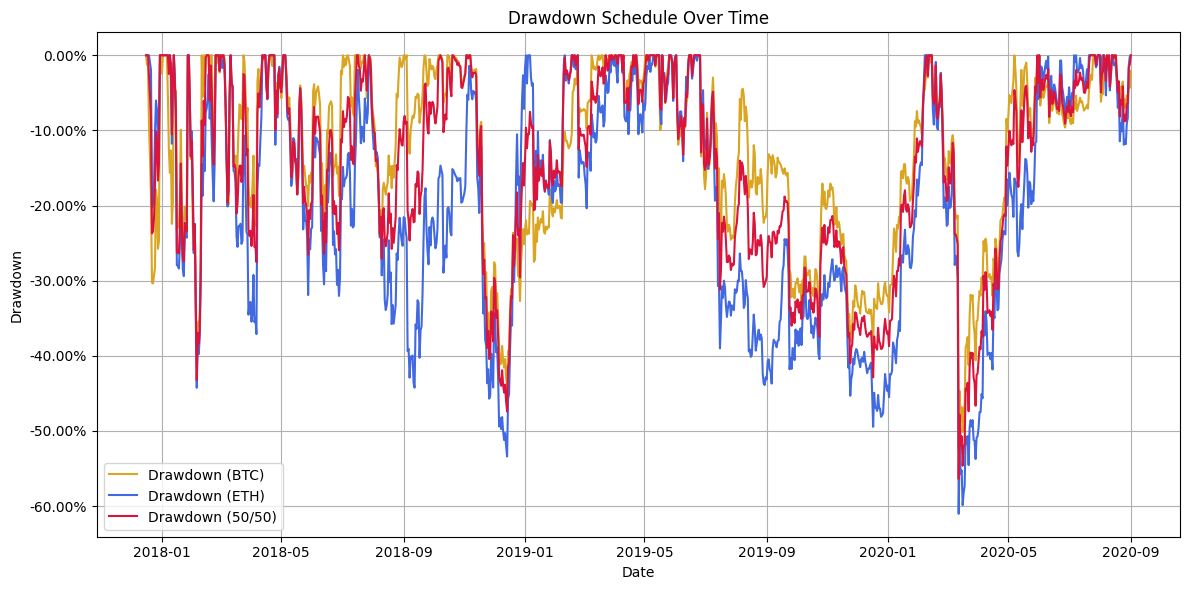

In [259]:
# Calculate drawdown schedule
from matplotlib.ticker import FuncFormatter

# Plot Drawdown
plt.figure(figsize=(12, 6))
plt.plot(dca_info_btc['Date'], dca_info_btc['Drawdown'], label='Drawdown (BTC)', color='goldenrod')
plt.plot(dca_info_eth['Date'], dca_info_eth['Drawdown'], label='Drawdown (ETH)', color='royalblue')
plt.plot(dca_info['Date'], dca_info['Drawdown'], label='Drawdown (50/50)', color='crimson')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.title('Drawdown Schedule Over Time')
plt.legend()
plt.grid(True)

# Format y-axis labels as percentages
def percentage_formatter(x, pos):
    return f'{x * 100:.2f}%'

plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

plt.tight_layout()
plt.show()

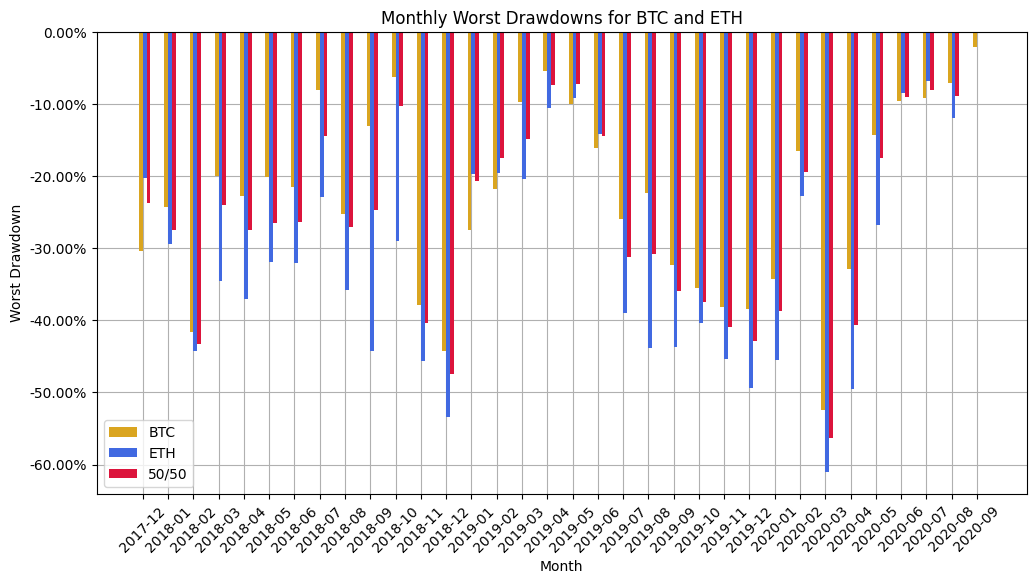

In [260]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Assuming you have dca_info_btc and dca_info_eth DataFrames with columns 'Date' and 'Drawdown'
# Convert the 'Date' column to datetime format if it's not already
dca_info_btc['Date'] = pd.to_datetime(dca_info_btc['Date'])
dca_info_eth['Date'] = pd.to_datetime(dca_info_eth['Date'])

# Create a function to calculate the worst drawdown for each month
def calculate_monthly_worst_drawdown(dca_info):
    # Group the data by year and month and calculate the minimum drawdown for each group
    monthly_worst_drawdown = dca_info.groupby([dca_info['Date'].dt.year, dca_info['Date'].dt.month])['Drawdown'].min()
    return monthly_worst_drawdown

# Calculate monthly worst drawdowns for BTC and ETH
monthly_worst_drawdown_btc = calculate_monthly_worst_drawdown(dca_info_btc)
monthly_worst_drawdown_eth = calculate_monthly_worst_drawdown(dca_info_eth)
monthly_worst_drawdown = calculate_monthly_worst_drawdown(dca_info)

# Create a bar chart for monthly worst drawdowns with thinner bars
plt.figure(figsize=(12, 6))
x_labels = [f"{year}-{month:02}" for year, month in monthly_worst_drawdown_btc.index]
btc_worst_drawdown = monthly_worst_drawdown_btc.values
eth_worst_drawdown = monthly_worst_drawdown_eth.values
worst_drawdown = monthly_worst_drawdown.values

bar_width = 0.15  # Reduce the width of the bars
bar_spacing = 0.0
index = range(len(x_labels))

# Manually adjust the x-axis positions for each set of data
plt.bar(index, btc_worst_drawdown, width=bar_width, label='BTC', color='goldenrod', zorder=2)  # Set higher zorder
plt.bar([i + (bar_spacing + bar_width) for i in index], eth_worst_drawdown, width=bar_width, label='ETH', color='royalblue', zorder=2)
plt.bar([i + 2 * (bar_spacing + bar_width) for i in index], worst_drawdown, width=bar_width, label='50/50', color='crimson', zorder=2)

plt.xlabel('Month')
plt.ylabel('Worst Drawdown')
plt.title('Monthly Worst Drawdowns for BTC and ETH')
plt.xticks([i + bar_width / 2 for i in index], x_labels, rotation=45)
plt.legend()
plt.grid(True)

# Format y-axis labels as percentages
def percentage_formatter(x, pos):
    return f'{x * 100:.2f}%'

plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
plt.show()

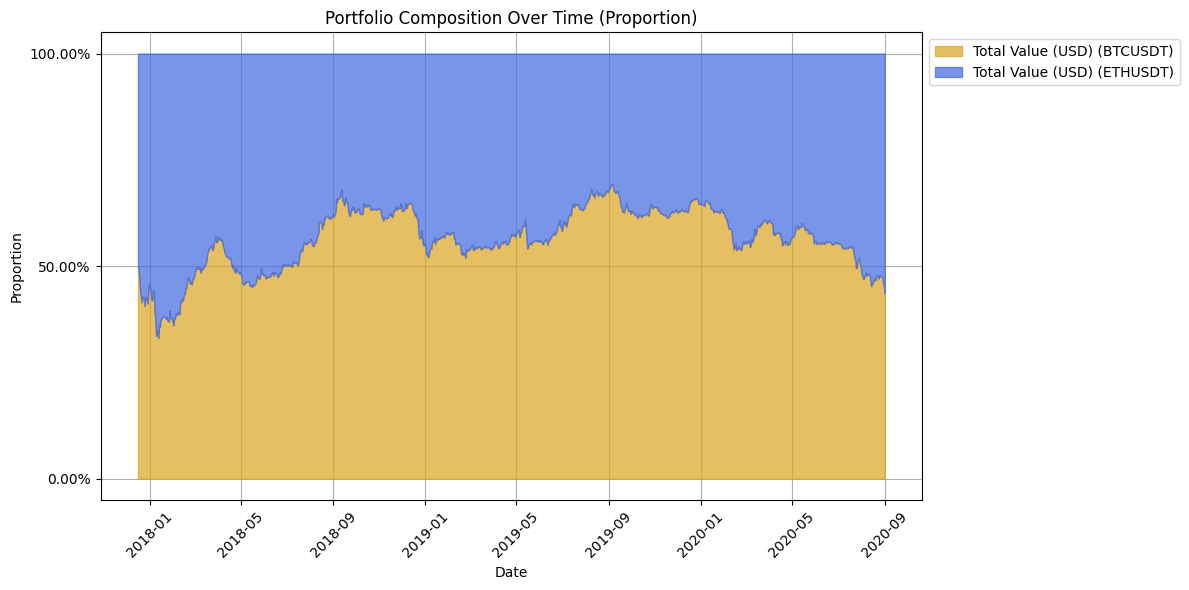

In [261]:
# Extract coin names (assuming the column names follow the pattern 'Total Value (USD) (Coin)')
coin_columns = [col for col in dca_info.columns if col.startswith('Total Value (USD) (')]

# Calculate the proportion of each coin in the portfolio
for coin_col in coin_columns:
    dca_info[f'Proportion ({coin_col})'] = dca_info[coin_col] / dca_info['Total Value (USD)']

# Extract the dates and Proportion for each coin
dates = dca_info['Date']
proportion_values = [dca_info[f'Proportion ({coin_col})'] for coin_col in coin_columns]

# Define line colors
line_colors = ['goldenrod', 'royalblue']

# Create a stacked area chart for proportions
plt.figure(figsize=(12, 6))

# Plot each coin's proportion as a stacked area
curr_proportion = 0
for i, coin_col in enumerate(coin_columns):
    plt.fill_between(dates, curr_proportion, curr_proportion + proportion_values[i], label=coin_col, color=line_colors[i], alpha = 0.7, zorder=2)
    curr_proportion = curr_proportion + proportion_values[i]

plt.xlabel('Date')
plt.ylabel('Proportion')
plt.title('Portfolio Composition Over Time (Proportion)')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.yticks([0, 0.5, 1.0])

# Format y-axis labels as percentages
def percentage_formatter(x, pos):
    return f'{x * 100:.2f}%'

plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
plt.tight_layout()
plt.show()

# Rebalancing

In [299]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def calculate_dca_strategy_rebalance(data, coin_proportions, start_date, end_date, investment_amount, interval_days):
    """
    Calculate the total amount of a portfolio of cryptocurrencies acquired through Dollar-Cost Averaging (DCA) strategy with rebalancing.

    Parameters:
        - data (DataFrame): DataFrame containing historical price data for multiple coins.
        - coin_proportions (dict): Dictionary specifying the coins to invest in and their proportions.
                                   Example: {'BTCUSDT': 0.7, 'ETHUSDT': 0.3} for 70% BTC and 30% ETH.
        - start_date (str): Start date of the DCA strategy in 'YYYY-MM-DD' format.
        - end_date (str): End date of the DCA strategy in 'YYYY-MM-DD' format.
        - investment_amount (float): Amount to invest in each DCA interval.
        - interval_days (int): Number of days between each DCA interval.

    Returns:
        - dca_info (DataFrame): DataFrame containing information about the portfolio's Total Invested (USD),
          Total Value (USD) for each coin, Total Value (USD) for the entire portfolio, and Drawdown for the portfolio.
    """
    # Convert the 'date' column to datetime format
    data['date'] = pd.to_datetime(data['date'])

    # Filter the data for the specified date range
    data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]
    data = data.reset_index()

    # Initialize dictionaries to store DCA information for each coin
    coin_acquired = {coin: [] for coin in coin_proportions}
    total_coin_accumulated = {coin: [] for coin in coin_proportions}
    total_value_at_interval = {coin: [] for coin in coin_proportions}
    total_invested_list = {coin: [] for coin in coin_proportions}
    drawdown_list = []

    # Initialize lists to store portfolio-level information
    total_value_portfolio_list = []
    total_investment_portfolio_list = []

    # Calculate the number of DCA intervals
    num_intervals = len(data)

    # Initialize dictionaries for total accumulated and invested amounts for each coin
    total_accumulated = {coin: 0.0 for coin in coin_proportions}
    total_investment = {coin: 0.0 for coin in coin_proportions}

    for i, row in data.iterrows():
        print(i)
        total_accumulated_portfolio = 0.0
        total_investment_portfolio = 0.0

        if i % interval_days == 0:
            # Calculate the current portfolio allocation
            current_allocation = {coin: total_accumulated[coin] * row[coin] for coin in coin_proportions}
            current_total_value = sum(current_allocation.values())

            # Calculate the necessary adjustments to reach the desired proportions
            adjustments = {coin: (proportion * current_total_value - current_allocation[coin]) / row[coin] for coin, proportion in coin_proportions.items()}

            for coin, proportion in coin_proportions.items():
                coin_price = row[coin]
                coin_amount = (investment_amount * proportion) / coin_price + adjustments[coin]
                total_accumulated[coin] += coin_amount
                total_investment[coin] += (investment_amount * proportion) + (coin_price * adjustments[coin])

        for coin, proportion in coin_proportions.items():
            coin_price = row[coin]
            total_coin_accumulated[coin].append(total_accumulated[coin])
            total_value_at_interval[coin].append(total_accumulated[coin] * coin_price)
            total_accumulated_portfolio += total_accumulated[coin]
            total_investment_portfolio += total_investment[coin]

        # Calculate total portfolio value and drawdown
        total_value_portfolio = sum([total_value_at_interval[coin][-1] for coin in coin_proportions])

        # Append total portfolio values and investments to lists
        total_value_portfolio_list.append(total_value_portfolio)
        total_investment_portfolio_list.append(total_investment_portfolio)

        # Calculate drawdown
        print(total_coin_accumulated)
        print(total_value_at_interval)
        print(total_value_portfolio_list)
        max_value = max(total_value_portfolio_list)
        drawdown = (total_value_portfolio_list[-1] - max_value) / max_value
        drawdown_list.append(drawdown)

    # Create a DataFrame with DCA information for each coin
    dca_info = pd.DataFrame({'Date': data['date'], 'Drawdown': drawdown_list})
    for coin in coin_proportions:
        dca_info[f'Total Coin Accumulated ({coin})'] = total_coin_accumulated[coin]
        dca_info[f'Total Value (USD) ({coin})'] = total_value_at_interval[coin]
        dca_info[f'Total Invested (USD) ({coin})'] = total_investment[coin]

    # Add portfolio-level information to the DataFrame
    dca_info['Total Value (USD)'] = total_value_portfolio_list
    dca_info['Total Invested (USD)'] = total_investment_portfolio_list

    # Add a column "Price" containing the price of each coin at each interval
    for coin in coin_proportions:
        dca_info[f'Price ({coin})'] = data[coin]

    return dca_info

dca_info_rebalance = calculate_dca_strategy_rebalance(data, {'BTCUSDT': 0.50, 'ETHUSDT': 0.50}, '2017-12-16', '2020-09-01', 100, interval_days)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



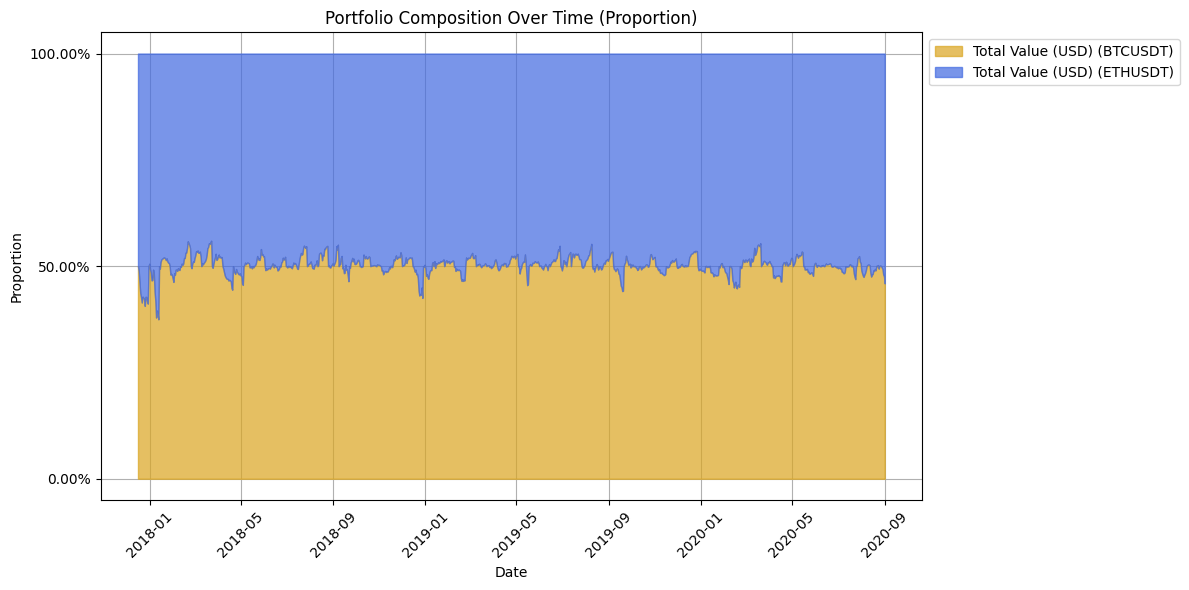

In [300]:
def print_proportion(dca_info):
    # Extract coin names (assuming the column names follow the pattern 'Total Value (USD) (Coin)')
    coin_columns = [col for col in dca_info.columns if col.startswith('Total Value (USD) (')]

    # Calculate the proportion of each coin in the portfolio
    for coin_col in coin_columns:
        dca_info[f'Proportion ({coin_col})'] = dca_info[coin_col] / dca_info['Total Value (USD)']

    # Extract the dates and Proportion for each coin
    dates = dca_info['Date']
    proportion_values = [dca_info[f'Proportion ({coin_col})'] for coin_col in coin_columns]

    # Define line colors
    line_colors = ['goldenrod', 'royalblue']

    # Create a stacked area chart for proportions
    plt.figure(figsize=(12, 6))

    # Plot each coin's proportion as a stacked area
    curr_proportion = 0
    for i, coin_col in enumerate(coin_columns):
        plt.fill_between(dates, curr_proportion, curr_proportion + proportion_values[i], label=coin_col, color=line_colors[i], alpha = 0.7, zorder=2)
        curr_proportion = curr_proportion + proportion_values[i]

    plt.xlabel('Date')
    plt.ylabel('Proportion')
    plt.title('Portfolio Composition Over Time (Proportion)')
    plt.xticks(rotation=45)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)

    plt.yticks([0, 0.5, 1.0])

    # Format y-axis labels as percentages
    def percentage_formatter(x, pos):
        return f'{x * 100:.2f}%'

    plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
    plt.tight_layout()
    plt.show()
    
print_proportion(dca_info_rebalance)

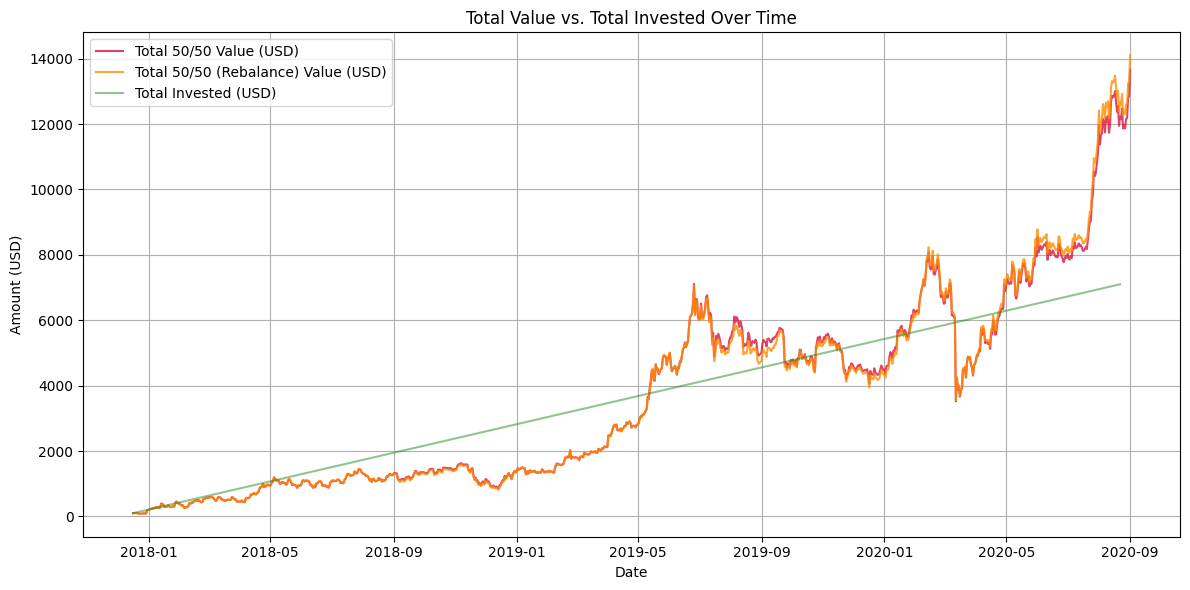

In [301]:
plt.figure(figsize=(12, 6))
plt.plot(dca_info['Date'], dca_info['Total Value (USD)'], label='Total 50/50 Value (USD)', color='crimson', alpha = 0.8)
plt.plot(dca_info_rebalance['Date'], dca_info_rebalance['Total Value (USD)'], label='Total 50/50 (Rebalance) Value (USD)', color='darkorange', alpha = 0.8)
plt.plot(dca_info_rebalance['Date'][::interval_days], dca_info_rebalance['Total Invested (USD)'][::interval_days], alpha=0.5, label='Total Invested (USD)', color='forestgreen')
plt.xlabel('Date')
plt.ylabel('Amount (USD)')
plt.title('Total Value vs. Total Invested Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

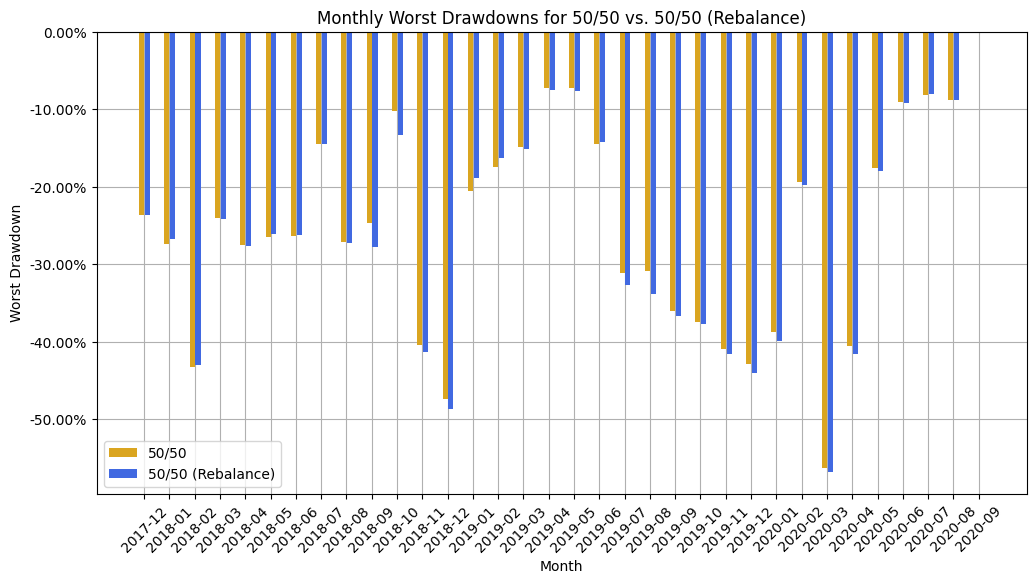

In [302]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Create a function to calculate the worst drawdown for each month
def calculate_monthly_worst_drawdown(dca_info):
    # Group the data by year and month and calculate the minimum drawdown for each group
    monthly_worst_drawdown = dca_info.groupby([dca_info['Date'].dt.year, dca_info['Date'].dt.month])['Drawdown'].min()
    return monthly_worst_drawdown

# Calculate monthly worst drawdowns for BTC and ETH
monthly_worst_drawdown_norebalance = calculate_monthly_worst_drawdown(dca_info)
monthly_worst_drawdown_rebalance = calculate_monthly_worst_drawdown(dca_info_rebalance)

# Create a bar chart for monthly worst drawdowns with thinner bars
plt.figure(figsize=(12, 6))
x_labels = [f"{year}-{month:02}" for year, month in monthly_worst_drawdown_btc.index]
worst_drawdown_norebalance = monthly_worst_drawdown_norebalance.values
worst_drawdown_rebalance = monthly_worst_drawdown_rebalance.values

bar_width = 0.2  # Reduce the width of the bars
bar_spacing = 0.03
index = range(len(x_labels))

# Manually adjust the x-axis positions for each set of data
plt.bar(index, worst_drawdown_norebalance, width=bar_width, label='50/50', color='goldenrod', zorder=2)  # Set higher zorder
plt.bar([i + (bar_width + bar_spacing) for i in index], worst_drawdown_rebalance, width=bar_width, label='50/50 (Rebalance)', color='royalblue', zorder=2)

plt.xlabel('Month')
plt.ylabel('Worst Drawdown')
plt.title('Monthly Worst Drawdowns for 50/50 vs. 50/50 (Rebalance)')
plt.xticks([i + bar_width / 2 for i in index], x_labels, rotation=45)
plt.legend()
plt.grid(True)

# Format y-axis labels as percentages
def percentage_formatter(x, pos):
    return f'{x * 100:.2f}%'

plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
plt.show()

In [303]:
dca_info_rebalance["Total Coin Accumulated (ETHUSDT)"][::14]

0       0.073227
14      0.133933
28      0.140523
42      0.185422
56      0.241975
         ...    
924    18.054663
938    17.780362
952    16.371817
966    15.942859
980    16.038438
Name: Total Coin Accumulated (ETHUSDT), Length: 71, dtype: float64